# Background

Strokes are one of the leading causes of death in the United States of America. They occur when blood supply to the brain is blocked or when a blood vessel in the brain is severed. A stroke may cause severe brain damage, long-term disability, or even death, however it is considered to be preventable and treatable. According to the [Centers for Disease Control and Prevention](https://www.cdc.gov/), strokes can happen at any age, but there are risk factors thatintesify an individual's chances of having a stroke including obesity, high cholesterol, tobacco use, and having heart disease. 

In this project, we will be looking at various risk factors and the possibility of a person having a stroke from  information giving in this [datset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download). 
The features provided are as follows:
- id: unique personal identifier
- gender: participant's sex/gender
- age: participant's age
- hypertension: [high blood pressure](https://www.cdc.gov/bloodpressure/about.htm)
- heart disease: disorder that affects the heart
- ever_married: particiapnt's marital status
- work_type: type of work
- Residence_type: participant's residential neighborhood type
- avg_glucose_level: amount of sugar in blood
- bmi: body mass index
- smoking_status: participant's tobbacco use
- stroke: low blood supply to the brain

# EDA

In [1]:
#handle imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create and set color palette
colors = ['#ee8881', '#729b6f', '#e0c48d', '#76a5af', '#d88e98']
sns.set_palette(sns.color_palette(colors)) 
sns.set_style(style='white')

In [3]:
#file handling
df = pd.read_csv('stroke-data.csv') 

In [4]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#first 10 rows of dataset
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


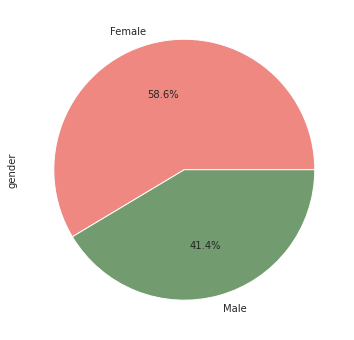

In [6]:
#gender distribution
df['gender'].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.show()

[Text(0, 0.5, ''), Text(0.5, 0, 'Age')]

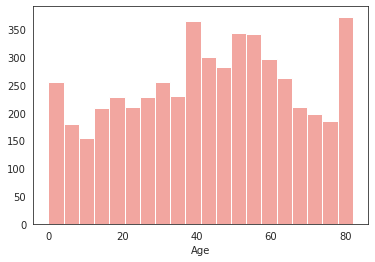

In [7]:
#age distribution
sns.histplot(x=df['age']).set(xlabel="Age", ylabel=None)

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, 'Ever Married')]

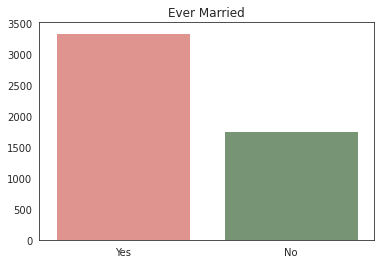

In [8]:
sns.countplot(x=df['ever_married']).set(title="Ever Married", xlabel=None, ylabel=None)

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, 'Residence Type')]

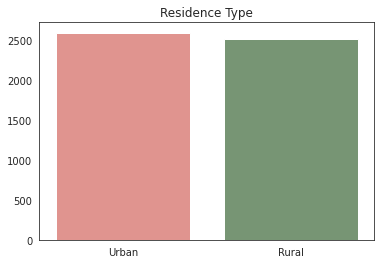

In [9]:
sns.countplot(x=df['Residence_type']).set(title="Residence Type", xlabel=None, ylabel=None)

Text(0, 0.5, 'Gender')

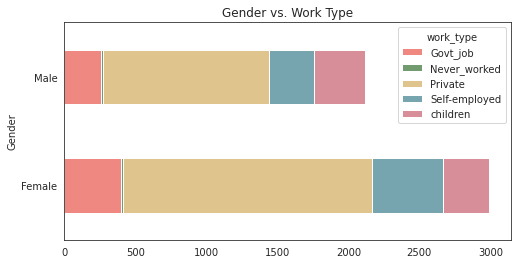

In [10]:
df.groupby(['gender', 'work_type']).size().unstack().plot(kind='barh', stacked=True, figsize=(8,4), title="Gender vs. Work Type")
plt.ylabel("Gender")

Text(0, 0.5, 'Gender')

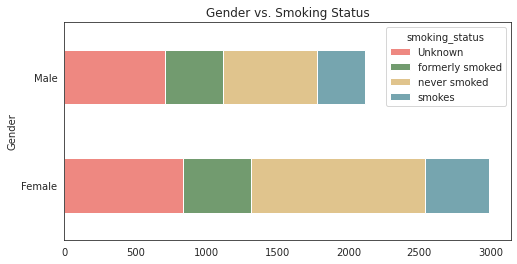

In [11]:
df.groupby(['gender', 'smoking_status']).size().unstack().plot(kind='barh', stacked=True, figsize=(8,4), title="Gender vs. Smoking Status")
plt.ylabel("Gender")

<Figure size 504x504 with 0 Axes>

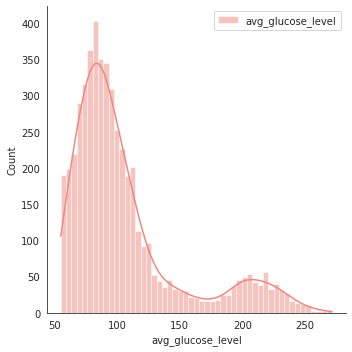

In [12]:
fig1 = plt.figure(figsize=(7,7))
sns.displot(df.avg_glucose_level, label="avg_glucose_level", kde= True)
plt.legend()

<Figure size 504x504 with 0 Axes>

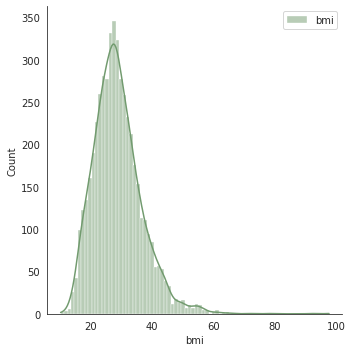

In [13]:
fig2 = plt.figure(figsize=(7,7))
sns.displot(df.bmi, color='#729b6f', label="bmi", kde= True)
plt.legend()

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Gender vs. Hypertension')]

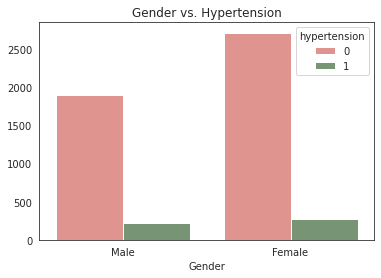

In [14]:
sns.countplot(x=df['gender'],hue=df['hypertension']).set(title='Gender vs. Hypertension', xlabel="Gender", ylabel=None)

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Gender vs. Heart Disease')]

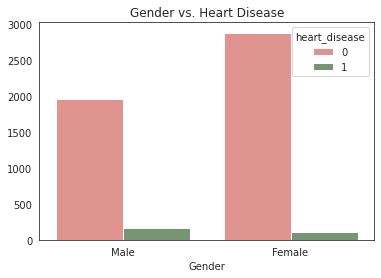

In [15]:
sns.countplot(x=df['gender'],hue=df['heart_disease']).set(title='Gender vs. Heart Disease', xlabel="Gender", ylabel=None)

# Machine Learning

In [16]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [18]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [19]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [20]:
x=df.drop('stroke',axis=1)

In [21]:
y=df['stroke']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
df.drop('id',axis=1,inplace=True)

In [24]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.414090,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.492612,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000
